## EDA on Bank Fraud Detection Dataset

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [ ]:
## load the data
bank_data = pd.read_csv('bank_transactions_data_2.csv')

## lets print first 5 rows
bank_data.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


In [3]:
## shape of this dataset
shape = bank_data.shape
print(f"Shape of this dataset is : {shape}")

Shape of this dataset is : (2512, 16)


In [4]:
## lets extract some data-types about the data
bank_data.dtypes

TransactionID               object
AccountID                   object
TransactionAmount          float64
TransactionDate             object
TransactionType             object
Location                    object
DeviceID                    object
IP Address                  object
MerchantID                  object
Channel                     object
CustomerAge                  int64
CustomerOccupation          object
TransactionDuration          int64
LoginAttempts                int64
AccountBalance             float64
PreviousTransactionDate     object
dtype: object

#### There are two columns 'TransactionDate' and 'PreviousTransactionDate' which should be in DateTime format but they are object, so we should change their datatype

In [5]:
## changing the data type from object to datetime of these two columns
bank_data['TransactionDate'] = pd.to_datetime(bank_data['TransactionDate'], format='%Y-%m-%d %H:%M:%S')
bank_data['PreviousTransactionDate'] = pd.to_datetime(bank_data['PreviousTransactionDate'], format='%Y-%m-%d %H:%M:%S')

In [6]:
## now lets check the data type of columns
bank_data.dtypes

TransactionID                      object
AccountID                          object
TransactionAmount                 float64
TransactionDate            datetime64[ns]
TransactionType                    object
Location                           object
DeviceID                           object
IP Address                         object
MerchantID                         object
Channel                            object
CustomerAge                         int64
CustomerOccupation                 object
TransactionDuration                 int64
LoginAttempts                       int64
AccountBalance                    float64
PreviousTransactionDate    datetime64[ns]
dtype: object

## Univariate analysis

In [8]:
## We'll use matplotlib and seaborn for Data Analysis
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='TransactionType', ylabel='count'>

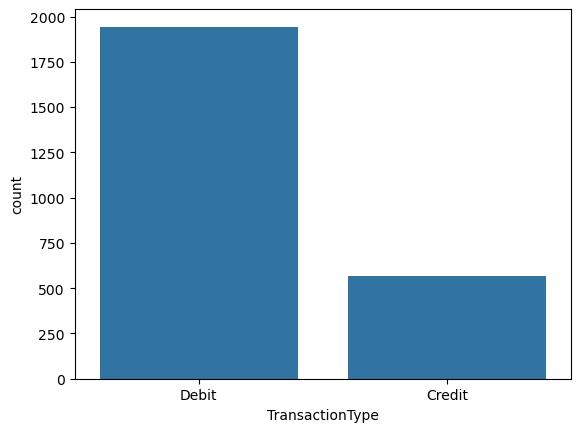

In [9]:
## making a countplot for transaction Type
sns.countplot(data=bank_data, x='TransactionType')

##### Most of the transactions are done via Debit Card

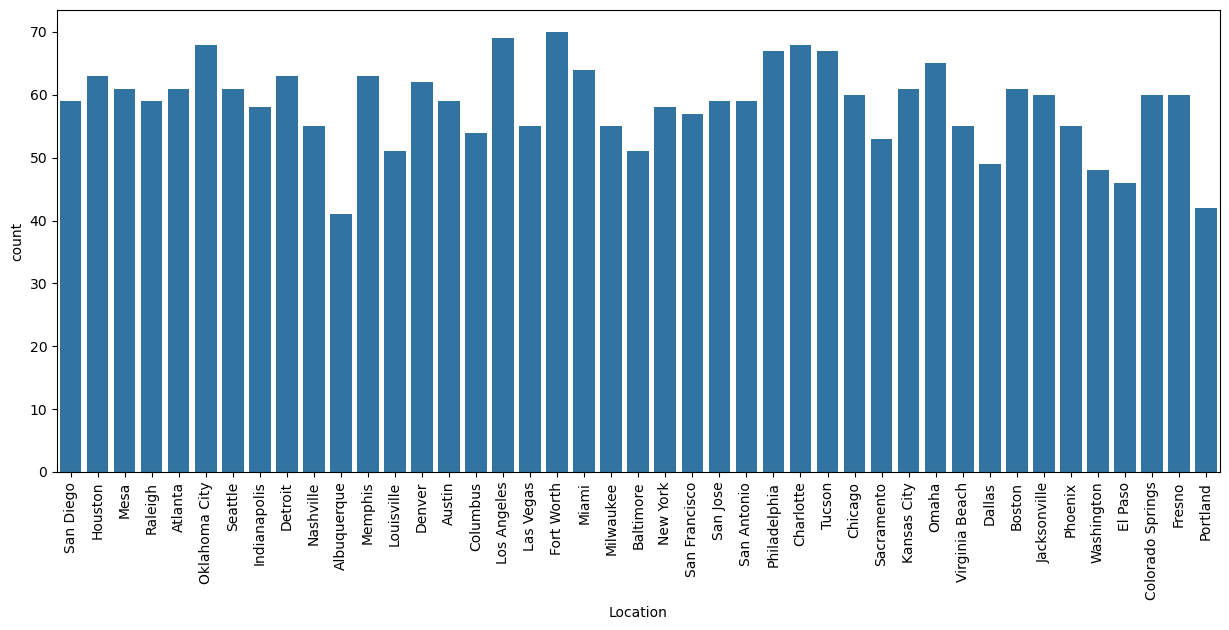

In [10]:
## making a countplot for Location
plt.figure(figsize=(15, 6))
sns.countplot(data=bank_data, x='Location')
plt.xticks(rotation=90) ## rotating x-axis labels for better readability
plt.show()

##### Here we can see that there is not a single location where transaction happened in majority, 

Lets check the countplot of DeviceId

In [11]:
bank_data.columns

Index(['TransactionID', 'AccountID', 'TransactionAmount', 'TransactionDate',
       'TransactionType', 'Location', 'DeviceID', 'IP Address', 'MerchantID',
       'Channel', 'CustomerAge', 'CustomerOccupation', 'TransactionDuration',
       'LoginAttempts', 'AccountBalance', 'PreviousTransactionDate'],
      dtype='object')

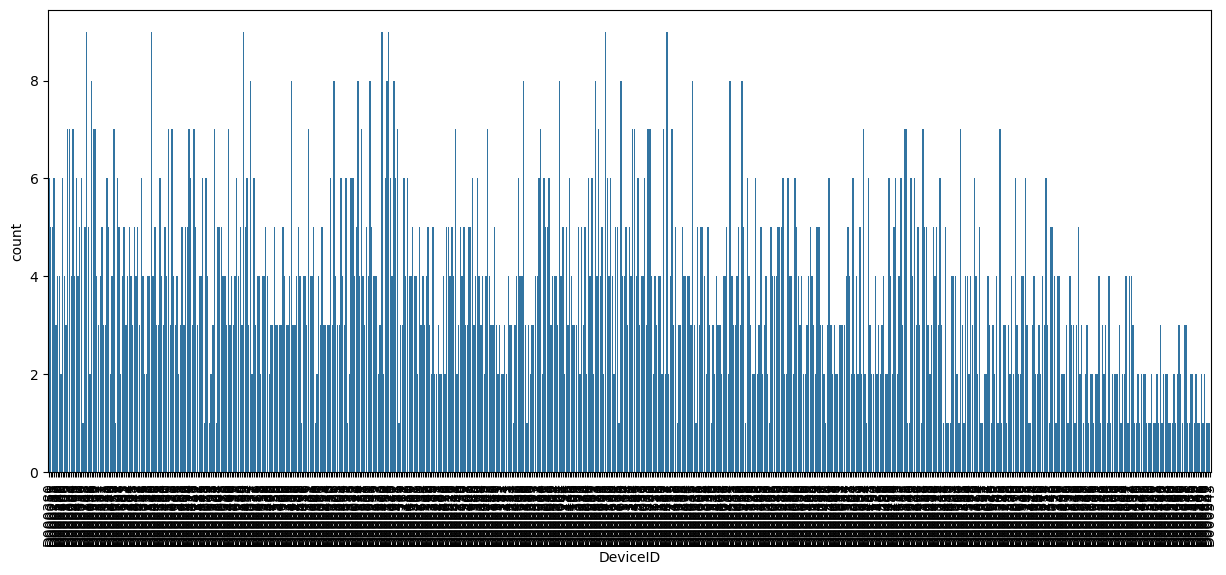

In [12]:
## making a countplot for Location
plt.figure(figsize=(15, 6))
sns.countplot(data=bank_data, x='DeviceID')
plt.xticks(rotation=90) ## rotating x-axis labels for better readability
plt.show()

In [13]:
#### Total locations we have
locations = bank_data['Location'].unique()
print(f"Total unique locations we have are : {len(locations)}")
print(" ")
print(f"Names of locations are : {locations}")

Total unique locations we have are : 43
 
Names of locations are : ['San Diego' 'Houston' 'Mesa' 'Raleigh' 'Atlanta' 'Oklahoma City'
 'Seattle' 'Indianapolis' 'Detroit' 'Nashville' 'Albuquerque' 'Memphis'
 'Louisville' 'Denver' 'Austin' 'Columbus' 'Los Angeles' 'Las Vegas'
 'Fort Worth' 'Miami' 'Milwaukee' 'Baltimore' 'New York' 'San Francisco'
 'San Jose' 'San Antonio' 'Philadelphia' 'Charlotte' 'Tucson' 'Chicago'
 'Sacramento' 'Kansas City' 'Omaha' 'Virginia Beach' 'Dallas' 'Boston'
 'Jacksonville' 'Phoenix' 'Washington' 'El Paso' 'Colorado Springs'
 'Fresno' 'Portland']


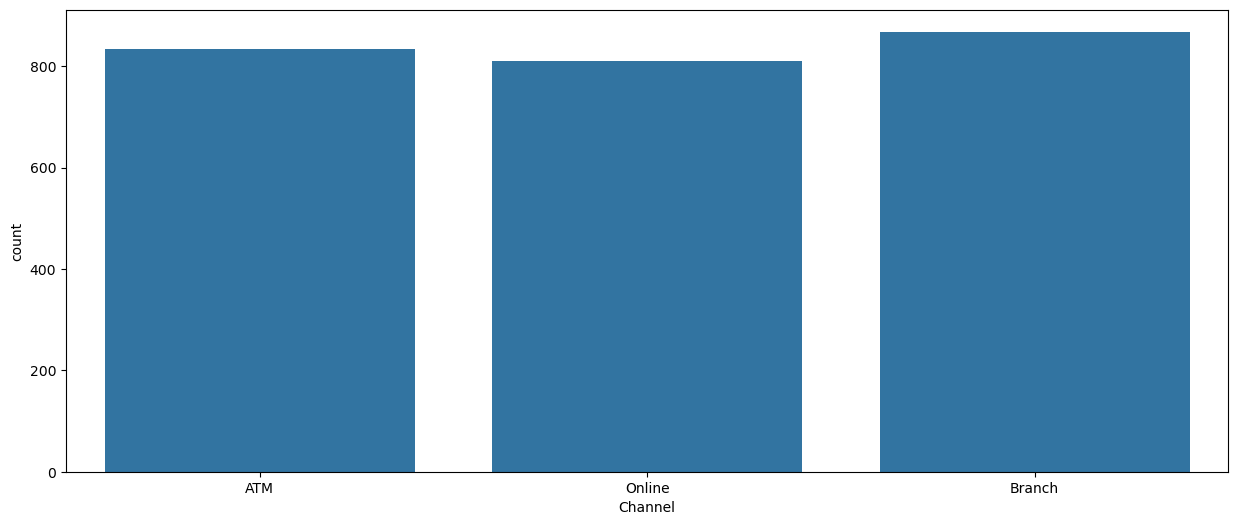

In [14]:
## making a countplot for channel
plt.figure(figsize=(15, 6))
sns.countplot(data=bank_data, x='Channel')
plt.show()

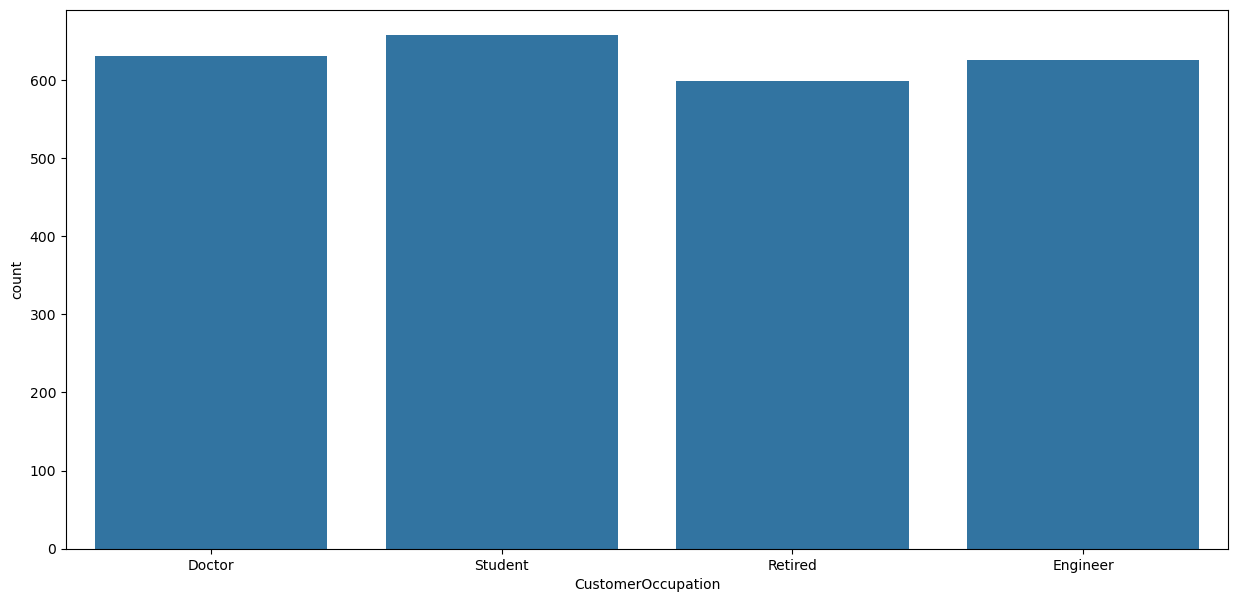

In [15]:
## lets make a countplot for customer occupation
plt.figure(figsize=(15, 7))
sns.countplot(data=bank_data, x='CustomerOccupation')
plt.show()

#### Four types of people are doing transaction
* Doctor
* Student
* Retired 
* Engineer

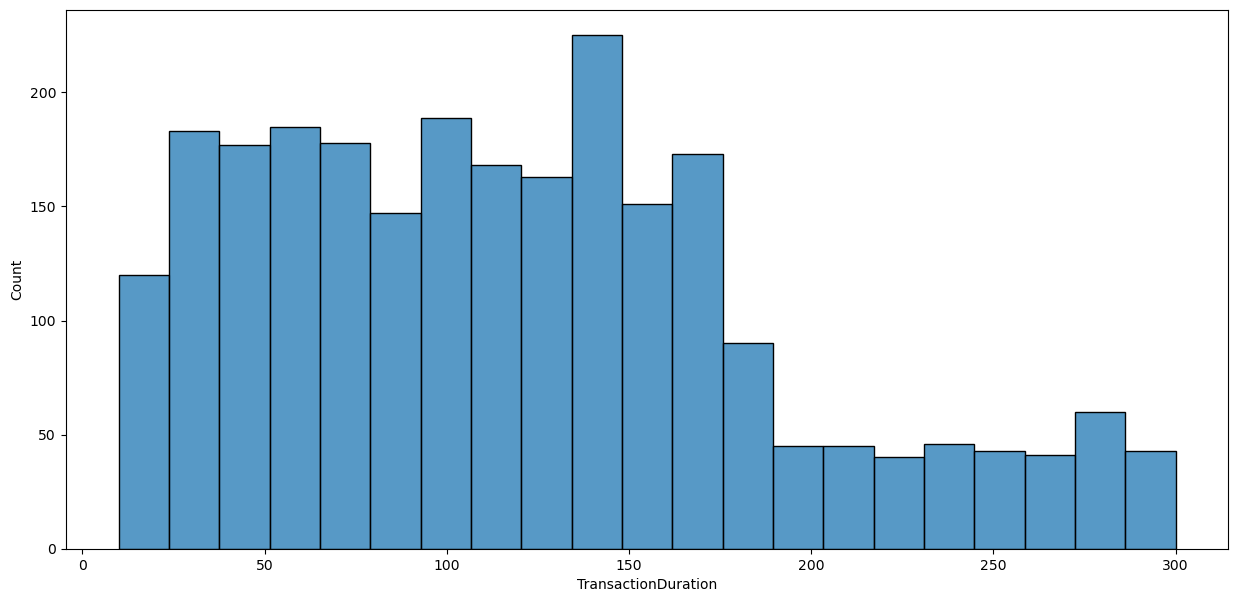

In [16]:
## lets make a histogram for transaction duration column
plt.figure(figsize=(15, 7))
sns.histplot(data=bank_data, x='TransactionDuration')
plt.show()

##### Insights
* There are few transactions that takes time above 200 seconds to complete

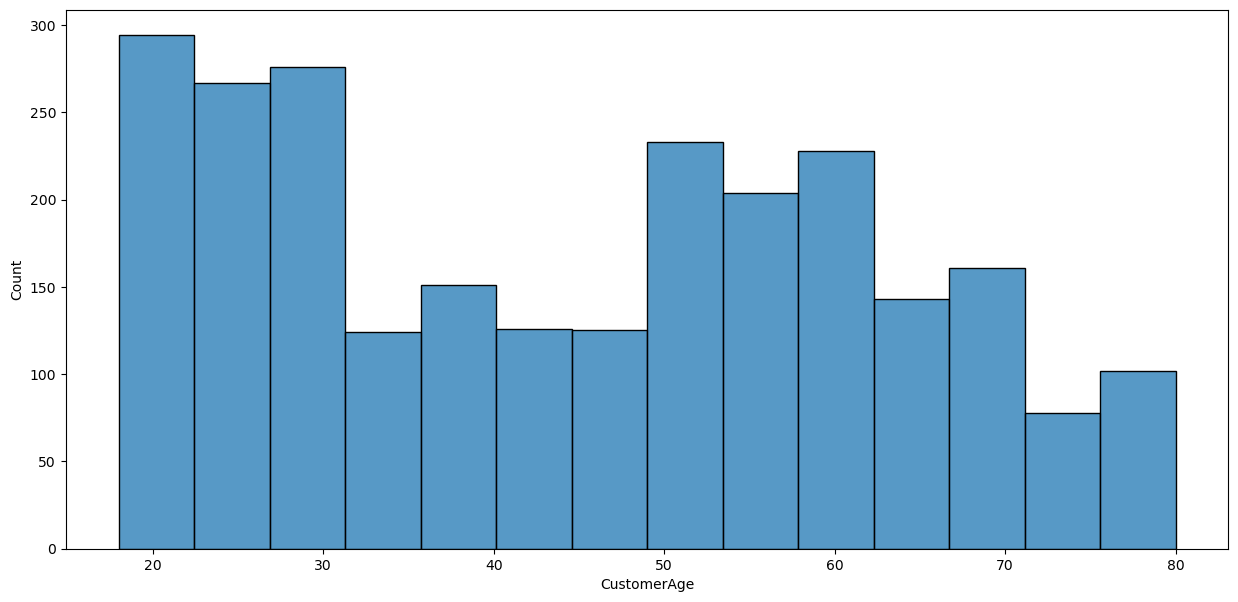

In [17]:
## lets make a histogram for customer age column
plt.figure(figsize=(15, 7))
sns.histplot(data=bank_data, x='CustomerAge')
plt.show()

##### Insights
* Most of the transactions are done by age-group between 20 to 30, which can be college students

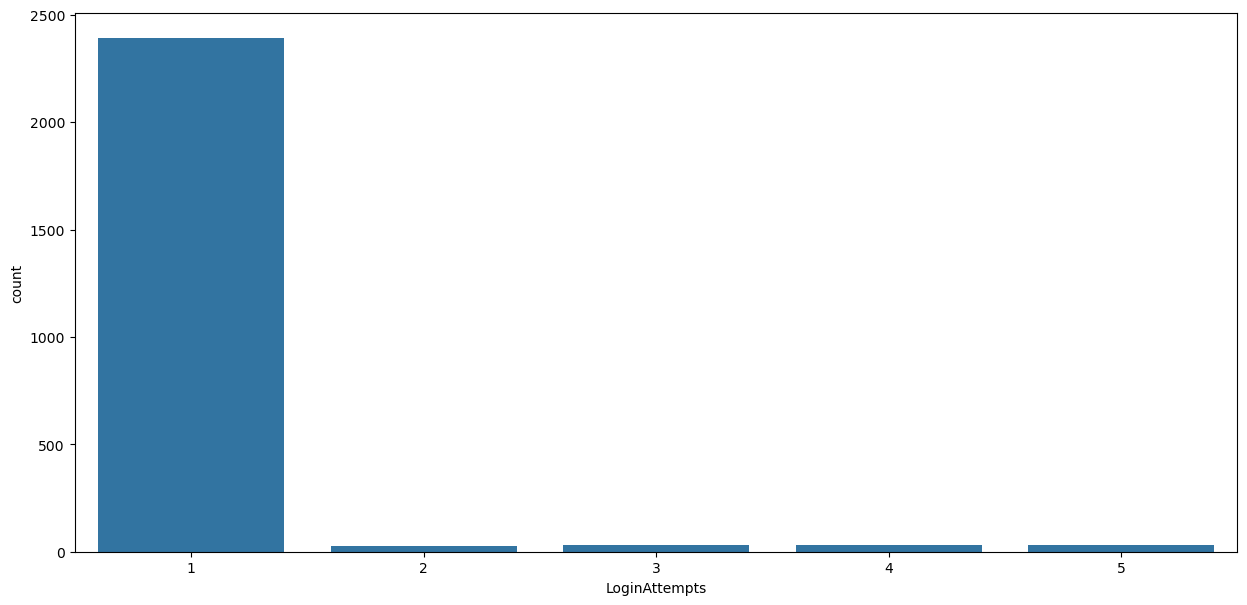

In [18]:
## lets make a barplot for login attempts column
plt.figure(figsize=(15, 7))
sns.countplot(data=bank_data, x='LoginAttempts')
plt.show()

##### Insights
* Most of the transactions happens in only 1 Login attempt
* But we know that if some fraud is happening then login attempts should be more
* We can clearly see that there are very few transactions where login attempts are greater than 2 or 3, they may be fraud

#### Lets see how many unique value we have in transactionID, AccountID, MerchantID

In [19]:
## unique transactionIDs
unique_transaction_ids = len(bank_data['TransactionID'].unique())
print(f"Unique transaction IDs we have are : {unique_transaction_ids}")
print(f"Total number of rows in data : {bank_data.shape[0]}")

Unique transaction IDs we have are : 2512
Total number of rows in data : 2512


* That means transactionID is unique for every rows, which makes sense

In [20]:
## unique AccountIDs
unique_account_ids = len(bank_data['AccountID'].unique())
print(f"Unique Account IDs we have are : {unique_account_ids}")
print(f"Total number of rows in data : {bank_data.shape[0]}")

Unique Account IDs we have are : 495
Total number of rows in data : 2512


*We have 495 Accounts who repeatedly done multiple transactions*

In [21]:
## unique AccountIDs
unique_merchant_ids = len(bank_data['MerchantID'].unique())
print(f"Unique Merchant IDs we have are : {unique_merchant_ids}")
print(f"Total number of rows in data : {bank_data.shape[0]}")

Unique Merchant IDs we have are : 100
Total number of rows in data : 2512


*There are only 100 merchants to whom repeatedly transactions are done*

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


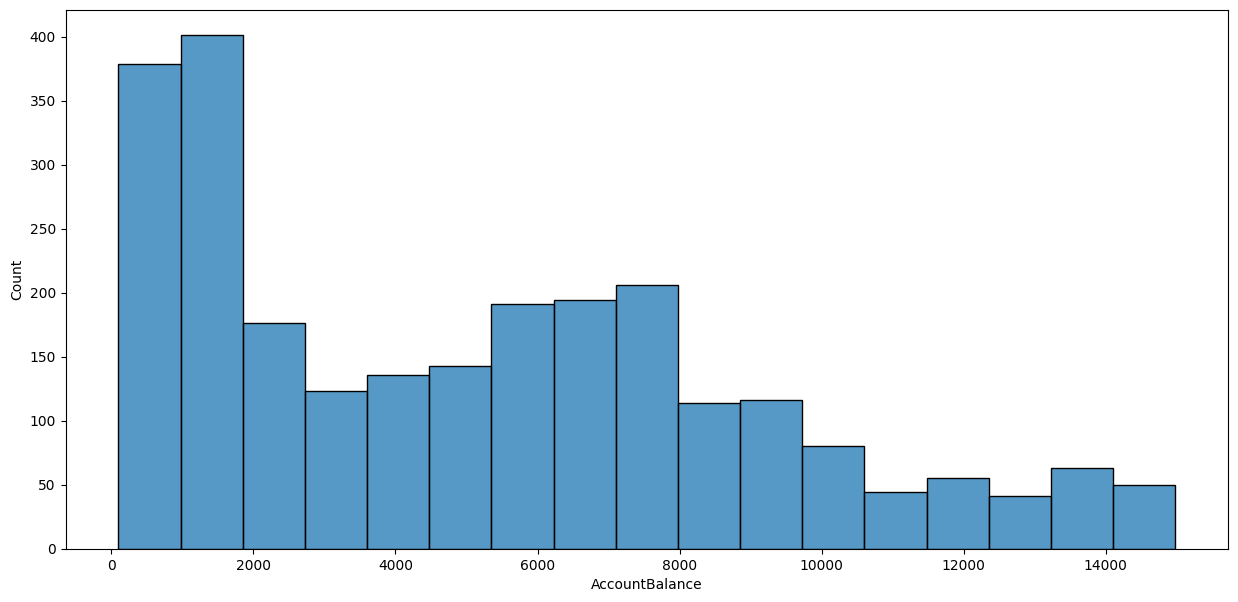

In [22]:
## Lets make a histplot of Amount of transactions
plt.figure(figsize=(15, 7))
sns.histplot(data=bank_data, x='AccountBalance')
plt.show()

##### Insights 
* We can see that very few transactions are done by Account holders whose balance in nearly 14000

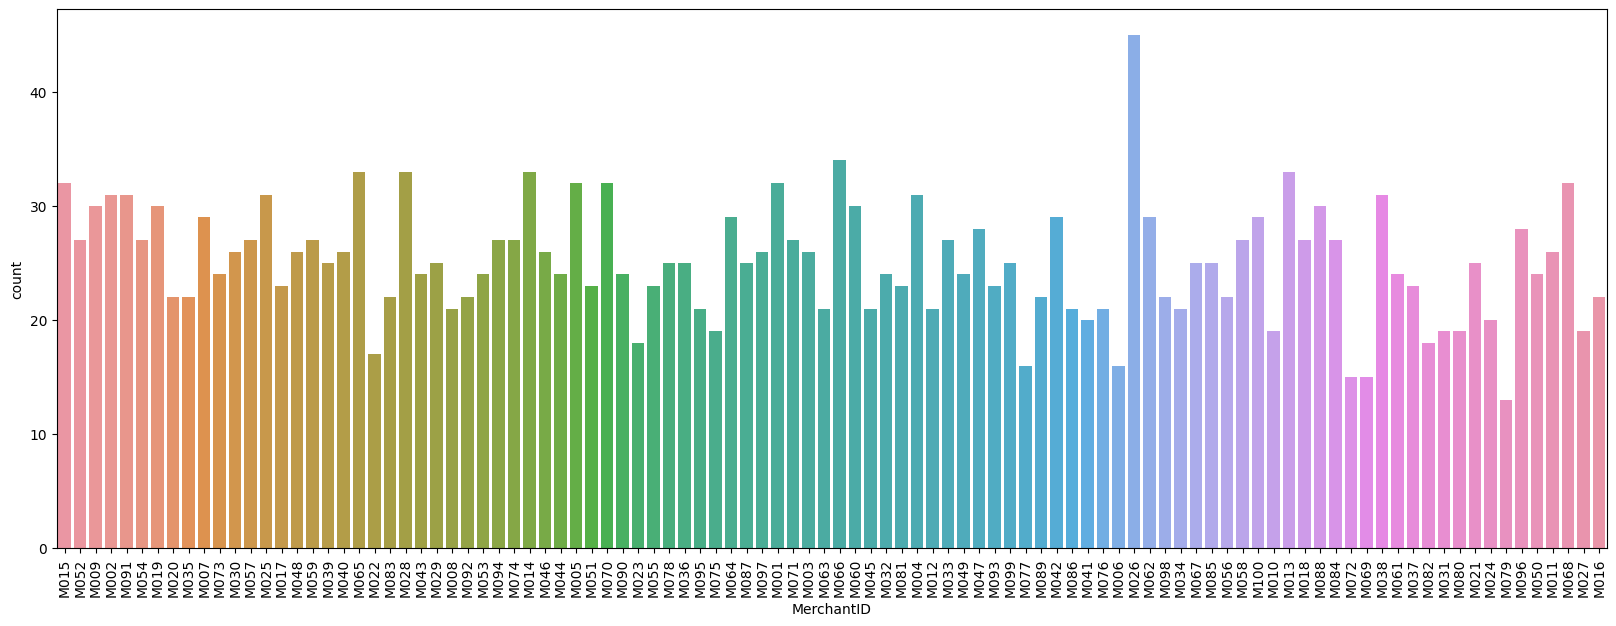

In [23]:
### Lets see which merchant got how many transactions
plt.figure(figsize=(20, 7))
sns.countplot(data=bank_data, x='MerchantID')
plt.xticks(rotation=90)
plt.show()

##### Merchant with ID : M026 got greater than 40 transactions while others are getting in range of 20 to 30

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


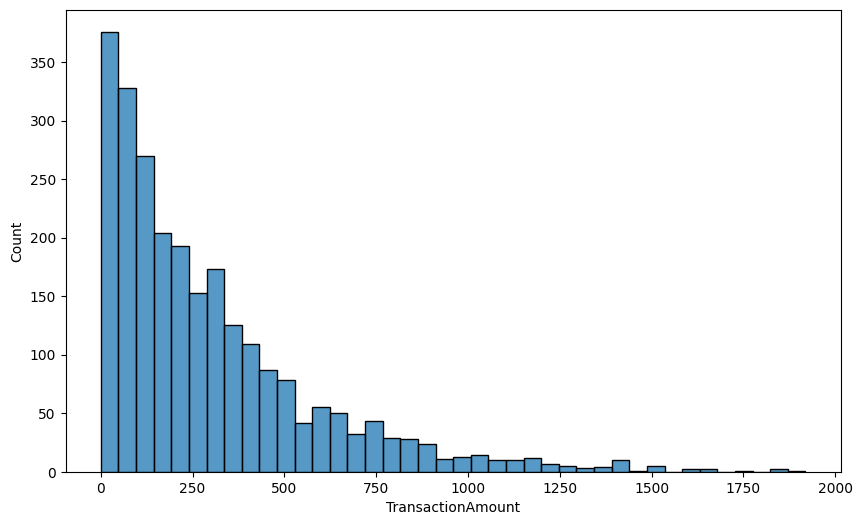

In [24]:
## lets make a histplot for transaction amount 
plt.figure(figsize=(10, 6))
sns.histplot(data=bank_data, x='TransactionAmount')
plt.show()

*Very few transactions happened of amount greater than 1000*

In [25]:
## frequency of transactions per year
filter_data_2023 = bank_data[bank_data['TransactionDate'].dt.year == 2023]
## data of transactions happended in 2024
filter_data_2024 = bank_data[bank_data['TransactionDate'].dt.year == 2024]

## storing the number of transaction for year 2023 and 2024
counts = [len(filter_data_2023), len(filter_data_2024)]
years = ['2023', '2024']

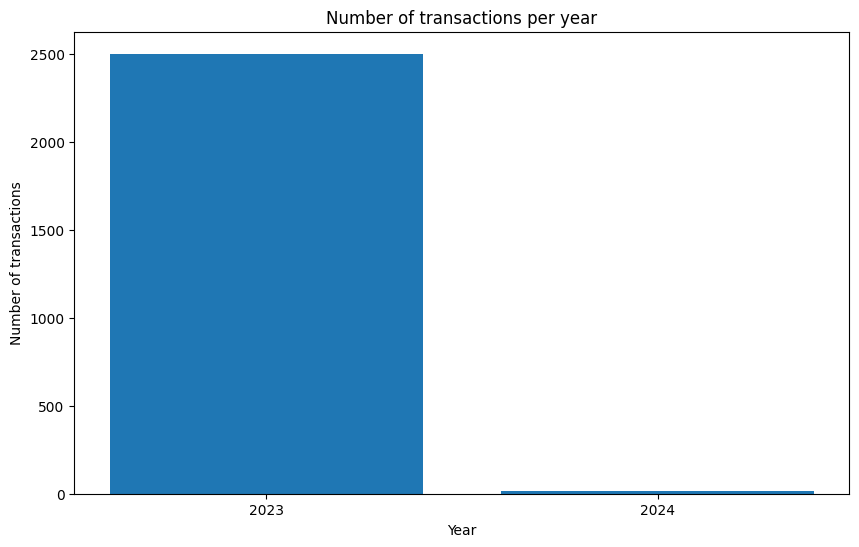

In [26]:
## lets plot a bar plot with x axis as years and y-axis contains number of transactions
plt.figure(figsize=(10, 6))
plt.bar(years, counts)
plt.xlabel("Year")
plt.ylabel("Number of transactions")
plt.title("Number of transactions per year")
plt.show()

*Data is mostly about transactions in year 2023*

In [27]:
## Monthly frequency of transactions
## lets first create a map for mapping numbers to name of months
month_label = {
    1 : 'January', 2 : 'February', 3 : 'March', 4 : 'April', 5 : 'May', 6 : 'June', 7 : 'July', 
    8 : 'August', 9 : 'September', 10 : 'October', 11 : 'November', 12 : 'December'
}


In [28]:
## months list to store months
months = []
## count list to store number of transaction in that month
counts = []

## creating a for loop that iterates for 1 to 12 th month and store the count of transactions
for i in range(1, 13):
    ## filter data by transaction in i th month
    filter_data = bank_data[bank_data['TransactionDate'].dt.month == i]
    ## store the month label
    months.append(month_label[i])
    ## store number of transaction in that month
    counts.append(len(filter_data))

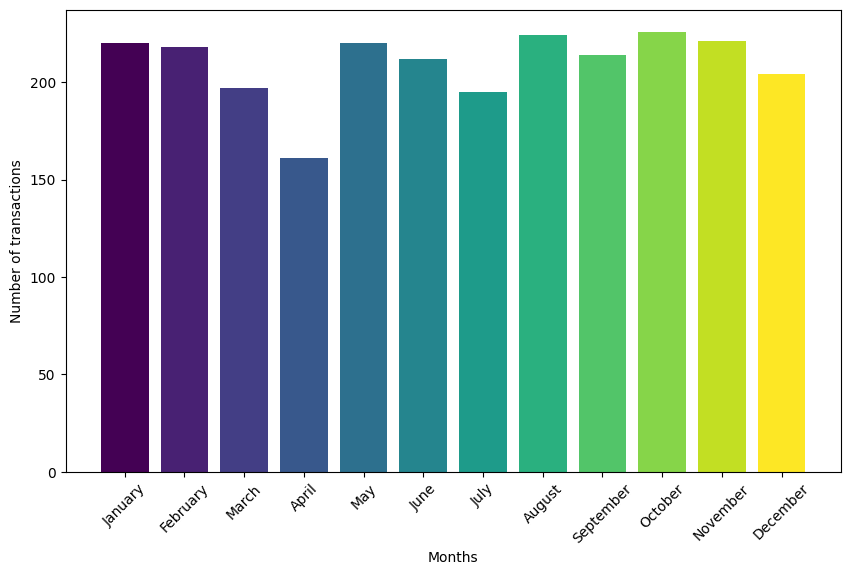

In [29]:
## lets make a plot of Monthly frequency if transactions
plt.figure(figsize=(10, 6))

# Create a colormap to assign different colors to each bar
colors = plt.cm.viridis(np.linspace(0, 1, len(months)))

plt.bar(months, counts, color=colors)
plt.xticks(rotation=45)
plt.xlabel('Months')
plt.ylabel('Number of transactions')
plt.show()

In [30]:
bank_data.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


In [31]:
## making a weekday column which stores that on which weekday transaction occurred
bank_data['Weekday'] = bank_data['TransactionDate'].dt.strftime('%A')
bank_data.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,Weekday
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08,Tuesday
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35,Tuesday
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04,Monday
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06,Friday
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39,Monday


*You can see that a new columns named 'Weekday' is added*

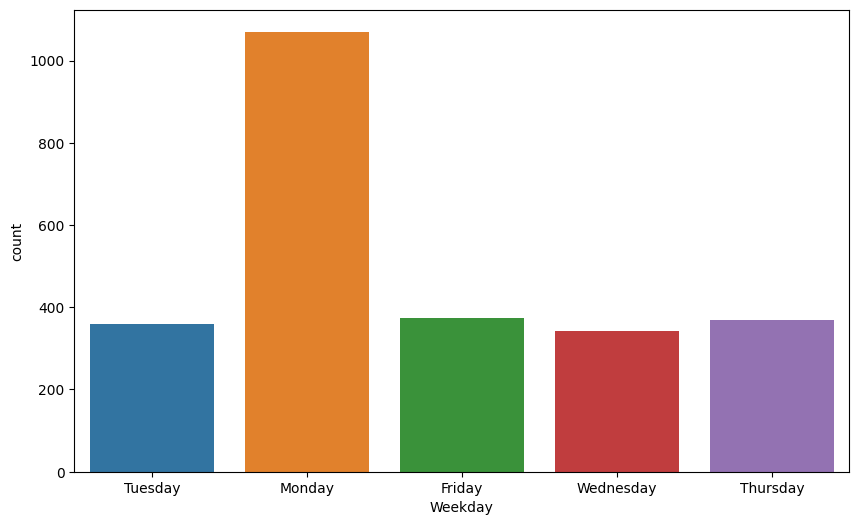

In [32]:
## now we'll make a countplot of number of transactions vs weekdays
plt.figure(figsize=(10, 6))
sns.countplot(data=bank_data, x="Weekday")
plt.show()

*We can see that most of the transactions happens on Monday*

In [33]:
## Lets check the 'IP Address' column
bank_data['IP Address'].nunique()

592

In data we have nearly 2512 transactions and total number of unique IP Address used are 592

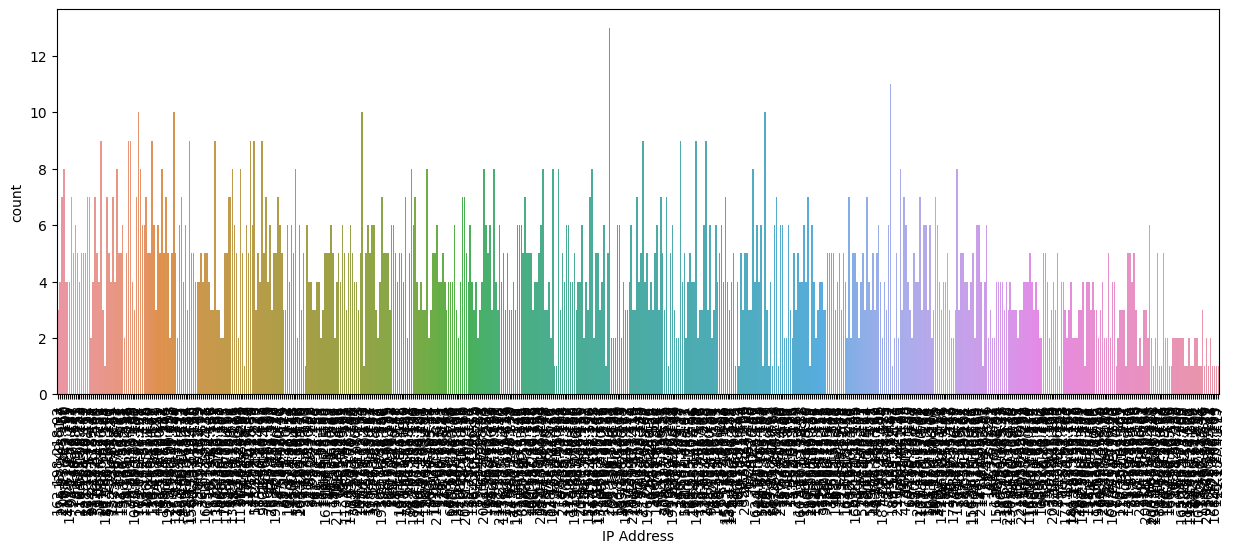

In [34]:
## lets plot a count plot for each IP address value (in which count represents for how many transactions this IP Address is used)
plt.figure(figsize=(15, 5))
sns.countplot(data=bank_data, x='IP Address')
plt.xticks(rotation=90)
plt.show()

In [35]:
## Lets find out how many IP Address have are used only once
indx_values = bank_data['IP Address'].value_counts()
## list for adding IP address used only once
unique_ip_one_count = []

for i in range(len(indx_values)):
    if indx_values.values[i] == 1:
        unique_ip_one_count.append(indx_values.index[i])
        
print(f"Unique IP Address used only once are : {len(unique_ip_one_count)}")

Unique IP Address used only once are : 40


In [36]:
transactions_amt = []

for i in range(len(unique_ip_one_count)):
    # Filter the dataframe where the 'IP Address' column equals the current IP in unique_ip_one_count
    amount = bank_data[bank_data['IP Address'] == unique_ip_one_count[i]]['TransactionAmount']
    transactions_amt.append(amount.tolist())  # Append the transaction amounts for this IP as a list

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


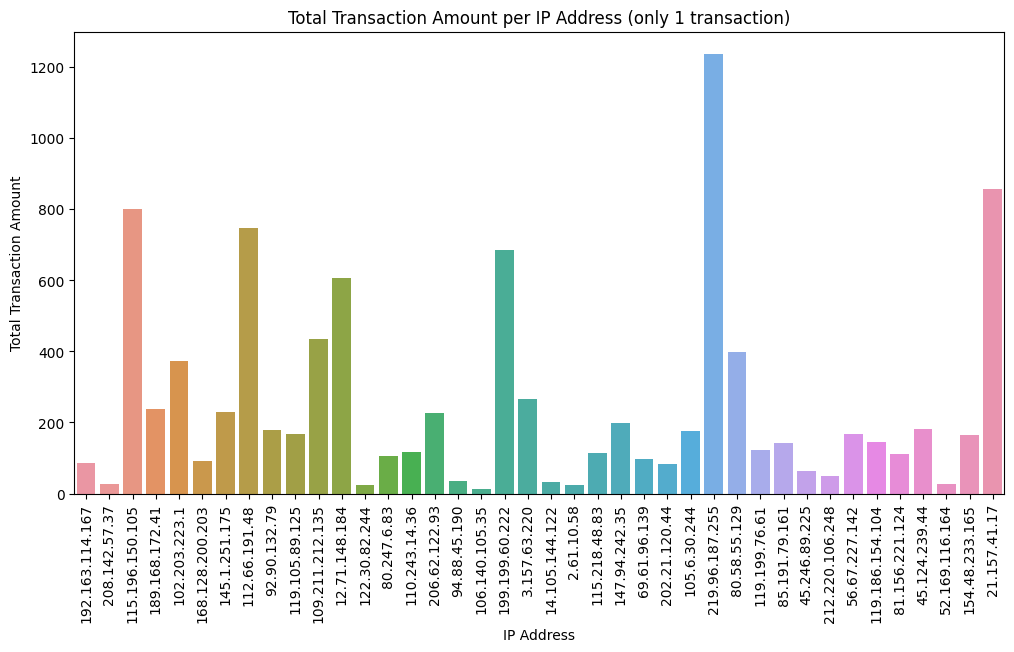

In [37]:
# Sum the transaction amounts for each IP address
total_transactions_amt = [sum(amount) for amount in transactions_amt]

# Create the bar plot
plt.figure(figsize=(12, 6))  # Optional: Adjust figure size for readability
sns.barplot(x=unique_ip_one_count, y=total_transactions_amt)
plt.xlabel("IP Address")
plt.ylabel("Total Transaction Amount")
plt.title("Total Transaction Amount per IP Address (only 1 transaction)")
plt.xticks(rotation=90)  # Rotate x labels for better readability if there are many IPs
plt.show()

## Bivariate Analysis

In [19]:
bank_data.columns

Index(['TransactionID', 'AccountID', 'TransactionAmount', 'TransactionDate',
       'TransactionType', 'Location', 'DeviceID', 'IP Address', 'MerchantID',
       'Channel', 'CustomerAge', 'CustomerOccupation', 'TransactionDuration',
       'LoginAttempts', 'AccountBalance', 'PreviousTransactionDate'],
      dtype='object')

<Axes: xlabel='TransactionAmount', ylabel='Density'>

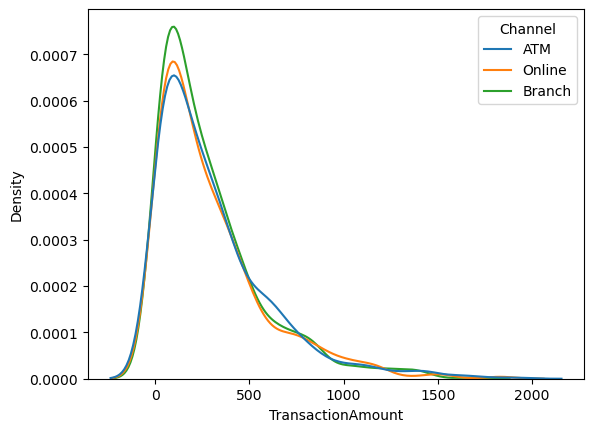

In [20]:
## Lets take the column - 'TransactionAmount' and use 'Channel' as hue (2 nd parameter on basis of what we classify)
sns.kdeplot(data=bank_data, x='TransactionAmount', hue='Channel')

All channels poses equal probability of doing transaction of particular amount

<Axes: xlabel='TransactionAmount', ylabel='Density'>

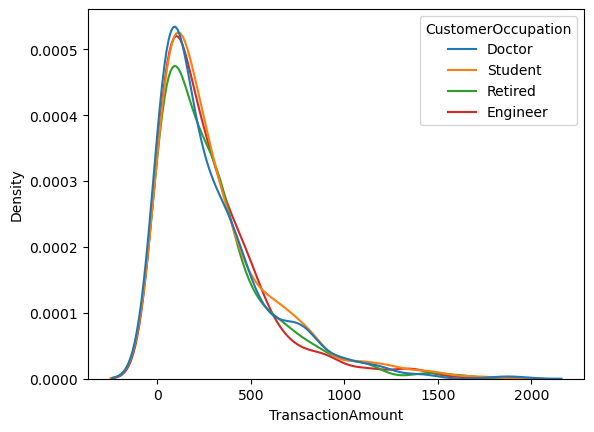

In [21]:
## Lets take the column - 'TransactionAmount' and use 'CustomerOccumpation' as hue (2 nd parameter on basis of what we classify)
sns.kdeplot(data=bank_data, x='TransactionAmount', hue='CustomerOccupation')

All occupation poses equal probability of doing transaction of particular amount

<Axes: xlabel='TransactionAmount', ylabel='Density'>

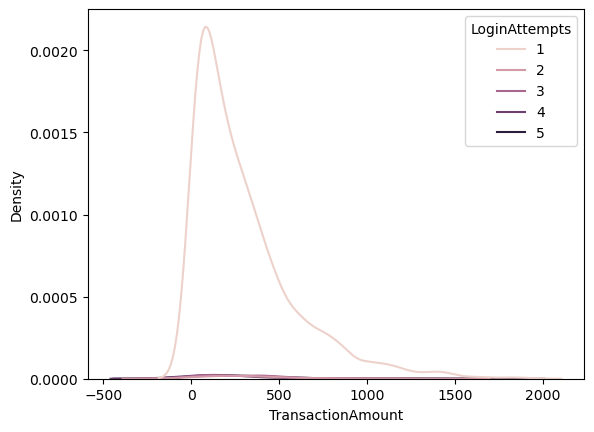

In [22]:
## Lets create KDE plot for transaction amount and Number of attempts to Login
sns.kdeplot(data=bank_data, x='TransactionAmount', hue='LoginAttempts')

We can see that at end of distribution (for higher transaction amounts) probability of doing transaction by 1 LoginAttempt decreases while doing transaction on multiple login attempts remain same

<Axes: xlabel='TransactionAmount', ylabel='TransactionDuration'>

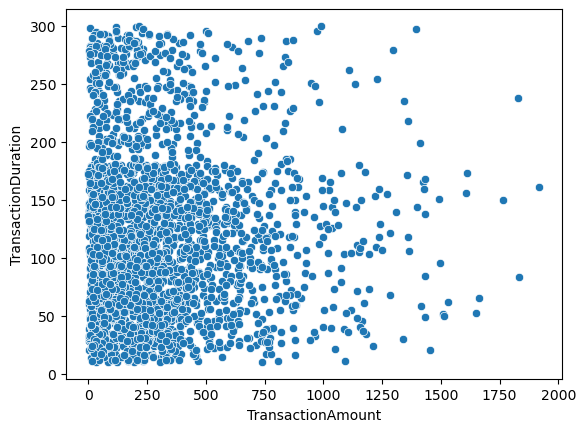

In [23]:
## Lets create scatter plot for transaction amount and Transaction duration
sns.scatterplot(data=bank_data, x='TransactionAmount', y='TransactionDuration')

<Axes: xlabel='TransactionAmount', ylabel='TransactionDuration'>

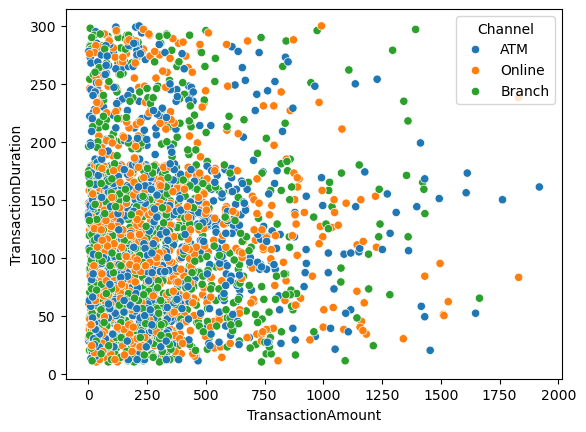

In [24]:
## Lets create scatter plot for transaction amount and Transaction duration and hue = Channel
sns.scatterplot(data=bank_data, x='TransactionAmount', y='TransactionDuration', hue='Channel')

We can see that majority of High transactions are happens through either ATM or branch

<Axes: xlabel='TransactionAmount', ylabel='TransactionDuration'>

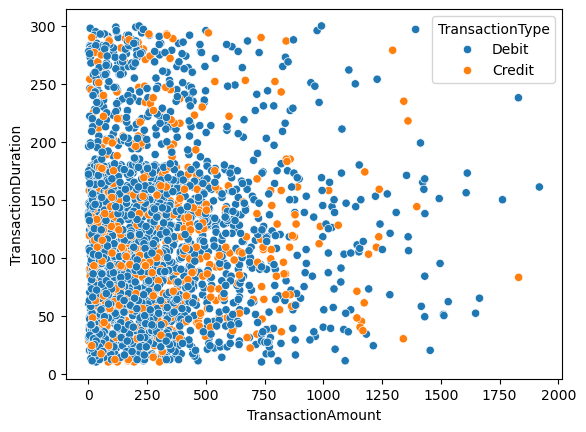

In [25]:
## Lets create scatter plot for transaction amount and Transaction duration and hue = TransactionType
sns.scatterplot(data=bank_data, x='TransactionAmount', y='TransactionDuration', hue='TransactionType')

<Axes: xlabel='TransactionAmount', ylabel='TransactionDuration'>

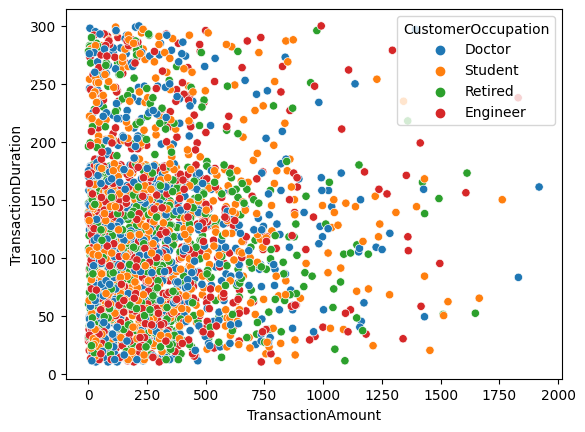

In [46]:
## Lets create scatter plot for transaction amount and Transaction duration and hue = CustomerOccupation
sns.scatterplot(data=bank_data, x='TransactionAmount', y='TransactionDuration', hue='CustomerOccupation')

<Axes: xlabel='TransactionAmount', ylabel='CustomerAge'>

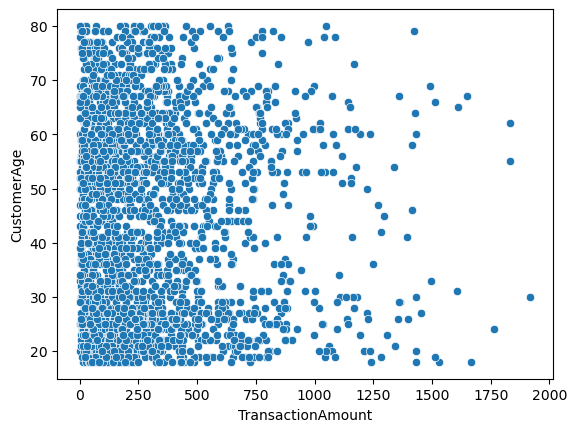

In [26]:
## Lets create scatter plot for transaction amount and Customer Age
sns.scatterplot(data=bank_data, x='TransactionAmount', y='CustomerAge')

<Axes: xlabel='TransactionAmount', ylabel='CustomerAge'>

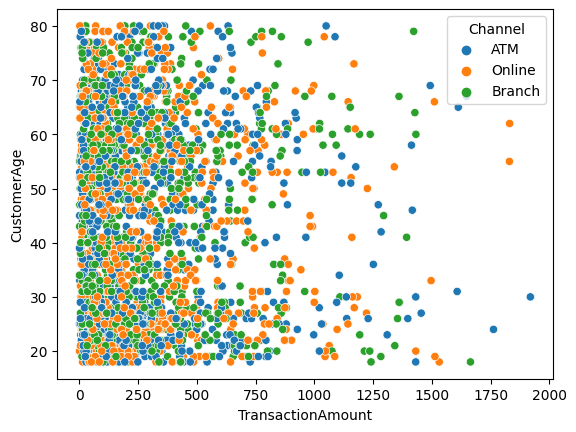

In [48]:
## Lets create scatter plot for transaction amount and Customer Age and hue = Channel
sns.scatterplot(data=bank_data, x='TransactionAmount', y='CustomerAge', hue='Channel')

<Axes: xlabel='TransactionAmount', ylabel='CustomerAge'>

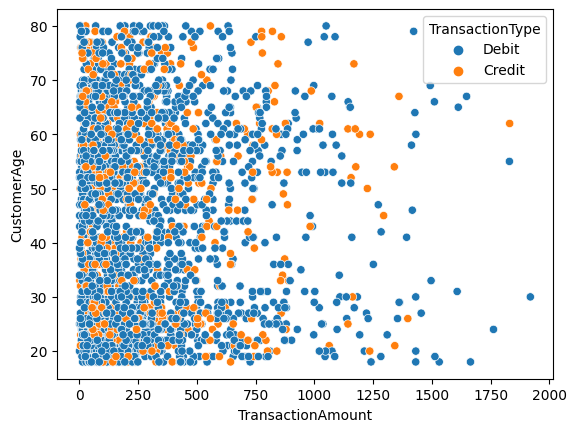

In [49]:
## Lets create scatter plot for transaction amount and CustomerAge and hue = TransactionType
sns.scatterplot(data=bank_data, x='TransactionAmount', y='CustomerAge', hue='TransactionType')

<Axes: xlabel='TransactionAmount', ylabel='CustomerAge'>

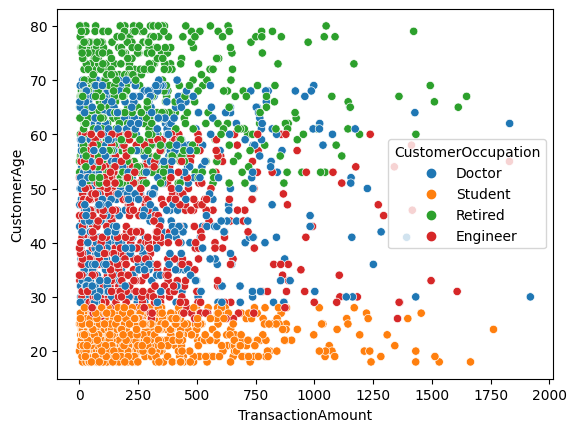

In [50]:
## Lets create scatter plot for transaction amount and CustomerAge and hue = CustomerOccupation
sns.scatterplot(data=bank_data, x='TransactionAmount', y='CustomerAge', hue='CustomerOccupation')

In [51]:
bank_data.columns

Index(['TransactionID', 'AccountID', 'TransactionAmount', 'TransactionDate',
       'TransactionType', 'Location', 'DeviceID', 'IP Address', 'MerchantID',
       'Channel', 'CustomerAge', 'CustomerOccupation', 'TransactionDuration',
       'LoginAttempts', 'AccountBalance', 'PreviousTransactionDate',
       'Weekday'],
      dtype='object')

<Axes: xlabel='AccountBalance', ylabel='TransactionAmount'>

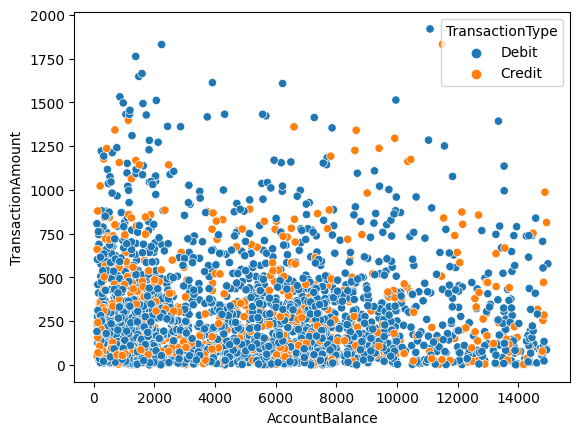

In [52]:
## scatter plot for account balance and Transaction amount
sns.scatterplot(x='AccountBalance', y='TransactionAmount', data=bank_data, hue='TransactionType')

#### Lets do the correlation analysis for Numerical columns

In [27]:
numerical_columns = bank_data.select_dtypes(exclude=['object', 'datetime']).columns
print(f"Numerical columns : {numerical_columns}")

Numerical columns : Index(['TransactionAmount', 'CustomerAge', 'TransactionDuration',
       'LoginAttempts', 'AccountBalance'],
      dtype='object')


In [28]:
## make a new dataframe only containing numerical columns to do correlation analysis
data_cols = bank_data[numerical_columns]
data_cols.head()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
0,14.09,70,81,1,5112.21
1,376.24,68,141,1,13758.91
2,126.29,19,56,1,1122.35
3,184.50,26,25,1,8569.06
4,13.45,26,198,1,7429.40


<Axes: >

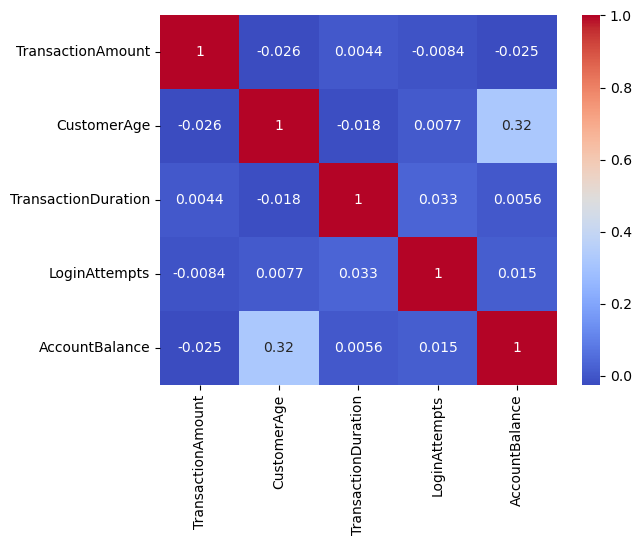

In [29]:
corr_matrix = data_cols.corr()
## making a heatmap
sns.heatmap(corr_matrix, cmap='coolwarm', annot = True)

## Fraud Detection

In [30]:
bank_data.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


Lets make a new column which contains difference between current trasaction and previous transaction from that account in minutes

In [31]:
## taking 0 minute at starting of 2023
def change_date_time_to_minutes(Date_time):
    return (Date_time.year-2023)*365*24*60 + Date_time.hour * 30 + Date_time.day + Date_time.hour * Date_time.minute

In [32]:
## trabsaforming date time columns to minutes
bank_data['TransactionDate'] = bank_data['TransactionDate'].apply(change_date_time_to_minutes)
bank_data['PreviousTransactionDate'] = bank_data['PreviousTransactionDate'].apply(change_date_time_to_minutes)

In [33]:
## making a new column (difference in minutes between current and previous transaction)
bank_data['Time_diffr'] = bank_data['TransactionDate'] - bank_data['PreviousTransactionDate']

In [34]:
bank_data.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,Time_diffr
0,TX000001,AC00128,14.09,955,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,525908,-524953
1,TX000002,AC00455,376.24,1211,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,525916,-524705
2,TX000003,AC00019,126.29,838,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,525900,-525062
3,TX000004,AC00070,184.50,997,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,525916,-524919
4,TX000005,AC00411,13.45,1393,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,525892,-524499


In [35]:
## drop the 'TransactionID', 'TransactionDate', 'PreviousTransactionDate', 'DeviceID', IP Address, 'MerchantID', 'AccountID', 'Location'
columns_to_drop = ['TransactionID', 'AccountID', 'TransactionDate', 'Location', 'DeviceID', 'IP Address', 'MerchantID', 'PreviousTransactionDate']
data_new = bank_data.drop(columns=columns_to_drop)
data_new.head()

,TransactionAmount,TransactionType,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,Time_diffr
0,14.09,Debit,ATM,70,Doctor,81,1,5112.21,-524953
1,376.24,Debit,ATM,68,Doctor,141,1,13758.91,-524705
2,126.29,Debit,Online,19,Student,56,1,1122.35,-525062
3,184.50,Debit,Online,26,Student,25,1,8569.06,-524919
4,13.45,Credit,Online,26,Student,198,1,7429.40,-524499


Nice!! Lets do one hot encoding of categorical columns and standardization of Numerical columns

In [36]:
## seperate out numerical and categorical columns
num_cols = data_new.select_dtypes(exclude='object').columns
cat_cols = data_new.select_dtypes(include='object').columns

print(f"Numerical columns : {num_cols}")
print(f"Categorical columns : {cat_cols}")

Numerical columns : Index(['TransactionAmount', 'CustomerAge', 'TransactionDuration',
       'LoginAttempts', 'AccountBalance', 'Time_diffr'],
      dtype='object')
Categorical columns : Index(['TransactionType', 'Channel', 'CustomerOccupation'], dtype='object')


In [54]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

ct = ColumnTransformer(
    transformers=[
        ("num_preprocess", StandardScaler(), num_cols),
        ("ohe", OneHotEncoder(), cat_cols)
    ]
)

In [51]:
## transforming the data
X = ct.fit_transform(data_new)

## Isolation Forest for Fraud detection

### Define and Fit Model
We’ll create a model variable and instantiate the IsolationForest class. We are passing the values of four parameters to the Isolation Forest method, listed below.

**Number of estimators**: n_estimators refers to the number of base estimators or trees in the ensemble, i.e. the number of trees that will get built in the forest. This is an integer parameter and is optional. The default value is 100.

**Max samples**: max_samples is the number of samples to be drawn to train each base estimator. If max_samples is more than the number of samples provided, all samples will be used for all trees. The default value of max_samples is ‘auto’. If ‘auto’, then max_samples=min(256, n_samples)

**Contamination**: This is a parameter that the algorithm is quite sensitive to; it refers to the expected proportion of outliers in the data set. This is used when fitting to define the threshold on the scores of the samples. The default value is ‘auto’. If ‘auto’, the threshold value will be determined as in the original paper of Isolation Forest.

**Max features**: All the base estimators are not trained with all the features available in the dataset. It is the number of features to draw from the total features to train each base estimator or tree.The default value of max features is one.

In [45]:
from sklearn.ensemble import IsolationForest

model = IsolationForest(n_estimators=100, max_samples='auto', contamination=0.05, max_features=1, random_state=42)
model

IsolationForest(contamination=0.05, max_features=1, random_state=42)

In [46]:
## fit the model
model.fit(X)

IsolationForest(contamination=0.05, max_features=1, random_state=42)

In [47]:
predictions = model.predict(X)

In [48]:
data_new.columns

Index(['TransactionAmount', 'TransactionType', 'Channel', 'CustomerAge',
       'CustomerOccupation', 'TransactionDuration', 'LoginAttempts',
       'AccountBalance', 'Time_diffr'],
      dtype='object')

<Axes: xlabel='CustomerAge', ylabel='TransactionAmount'>

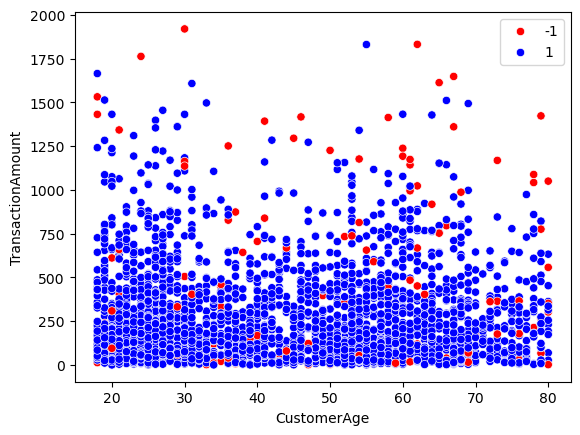

In [49]:
## plotting the predictions
sns.scatterplot(data=data_new, x='CustomerAge', y='TransactionAmount', hue=predictions, 
                palette={1: "blue", -1: "red"}) 

#### The red one are Fraud

### Add Scores and Anomaly Column
After the model is defined and fit, let’s find the scores and anomaly column. We can find out the values of scores column by calling `decision_function()` of the trained model and passing the salary as parameter.

Similarly we can find the values of anomaly column by calling the `predict()` function of the trained model and passing the transaction amount as parameter.


In [63]:
data_new['score'] = model.decision_function(X)
data_new['anomaly'] = predictions
# data_new.head(25)

### Print Anomalies
To print the predicted anomalies in the data we need to analyse the data after addition of scores and anomaly column. As you can see above for the predicted anomalies the anomaly column values would be -1 and their scores will be negative.

Using this information we can print the predicted anomaly (two data points in this case) as below.

In [62]:
anomaly = data_new.loc[data_new['anomaly'] == -1]
anomaly_index = list(anomaly.index)
# print(anomaly)
anomaly.head(-1)

,TransactionAmount,TransactionType,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,Time_diffr,score,anomaly
6,7.08,Credit,ATM,37,Doctor,139,1,13316.71,-524853,-0.000276,-1
25,7.49,Credit,Online,65,Retired,276,1,3634.67,-524485,-0.000003,-1
32,396.45,Debit,ATM,49,Engineer,168,3,9690.15,-525011,-0.003816,-1
38,795.31,Debit,ATM,66,Doctor,90,2,7914.88,-525291,-0.009040,-1
61,263.99,Debit,Branch,79,Retired,227,2,4175.02,-525324,-0.014780,-1
...,...,...,...,...,...,...,...,...,...,...,...
2372,95.23,Debit,Online,20,Student,60,3,966.88,-524530,-0.005667,-1
2380,1173.74,Credit,Online,61,Doctor,61,1,10456.24,-524691,-0.004560,-1
2423,332.06,Debit,ATM,29,Doctor,221,4,11826.52,-524783,-0.010257,-1
2445,403.01,Debit,Online,63,Doctor,286,3,10513.52,-524858,-0.007048,-1


# Thank You ❤️